#### 데이터 로드 및 단어 토큰화

#### [리뷰 감성 분석]  
- 데이터셋 : IMDb_Review.csv  
- 시계열/자연어 데이터를 Convolution Layer 처리

In [9]:
## 모듈 다운로드
## - 데이터 분석 및 시각화
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt			
from tqdm import tqdm						## 진행상황 시각화 프로그레스바 progressbar

## - 형태소 분석기 (영어)
import nltk
from nltk.tokenize import word_tokenize

## Pytorch 관련
import torch

## - 데이터셋 : 학습용/검증용/테스트용 분리 
from sklearn.model_selection import train_test_split

## - Vocab 생성 시 단어 빈도 처리 위한 Python 기본 모듈듈
from collections import Counter

In [10]:
## 데이터 준비
DATA_FILE = '../data/IMDb_Reviews.csv'

In [11]:
## 데이터 로딩 및 기본 정보 확인
df = pd.read_csv(DATA_FILE)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


In [12]:
df.head(2)

,review,sentiment
0,My family and I normally do not watch local mo...,1
1,"Believe it or not, this was at one time the wo...",0


In [13]:
print('결측값 여부 :',df.isnull().values.any())

결측값 여부 : False


<Axes: xlabel='sentiment'>

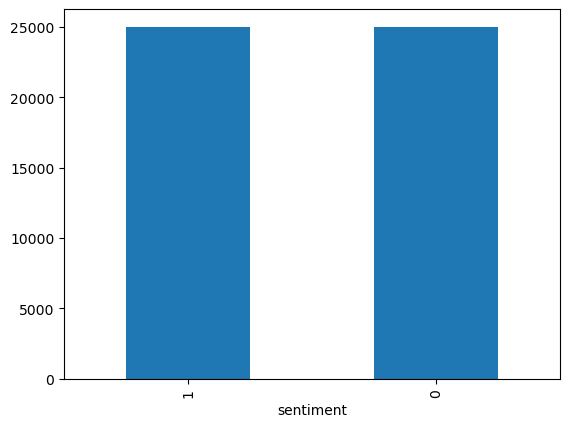

In [14]:
## pandas에 plot(kind=시각화그래프설정) 메서드
df['sentiment'].value_counts().plot(kind='bar')

In [15]:
print('레이블 개수')
print(df.groupby('sentiment').size().reset_index(name='count'))

레이블 개수
   sentiment  count
0          0  25000
1          1  25000


In [16]:
df['sentiment'] = df['sentiment'].replace(['positive','negative'],[1, 0])

In [17]:
df.head()

,review,sentiment
0,My family and I normally do not watch local mo...,1
1,"Believe it or not, this was at one time the wo...",0
2,"After some internet surfing, I found the ""Home...",0
3,One of the most unheralded great works of anim...,1
4,"It was the Sixties, and anyone with long hair ...",0


In [18]:
X_data = df['review']
y_data = df['sentiment']
print('영화 리뷰의 개수: {}'.format(len(X_data)))
print('레이블의 개수: {}'.format(len(y_data)))

영화 리뷰의 개수: 50000
레이블의 개수: 50000


- 데이터셋 분리 : 학습용/검증용/테스트용 분리

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.5, random_state=0, stratify=y_data)

In [20]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=.2, random_state=0, stratify=y_train)

In [21]:
print('--------훈련 데이터의 비율-----------')
print(f'부정 리뷰 = {round(y_train.value_counts()[0]/len(y_train) * 100,3)}%')
print(f'긍정 리뷰 = {round(y_train.value_counts()[1]/len(y_train) * 100,3)}%')
print('--------검증 데이터의 비율-----------')
print(f'부정 리뷰 = {round(y_valid.value_counts()[0]/len(y_valid) * 100,3)}%')
print(f'긍정 리뷰 = {round(y_valid.value_counts()[1]/len(y_valid) * 100,3)}%')
print('--------테스트 데이터의 비율-----------')
print(f'부정 리뷰 = {round(y_test.value_counts()[0]/len(y_test) * 100,3)}%')
print(f'긍정 리뷰 = {round(y_test.value_counts()[1]/len(y_test) * 100,3)}%')

--------훈련 데이터의 비율-----------
부정 리뷰 = 50.0%
긍정 리뷰 = 50.0%
--------검증 데이터의 비율-----------
부정 리뷰 = 50.0%
긍정 리뷰 = 50.0%
--------테스트 데이터의 비율-----------
부정 리뷰 = 50.0%
긍정 리뷰 = 50.0%


- 단어사전 생성 <hr>

In [22]:
## 토큰화 진행 가능 함수수
def tokenize(sentences):
  tokenized_sentences = []
  for sent in tqdm(sentences):
    tokenized_sent = word_tokenize(sent)
    tokenized_sent = [word.lower() for word in tokenized_sent]
    ## 불용어 제거, 원형 복원, 구두점 추가해서 정리
    tokenized_sentences.append(tokenized_sent)
  return tokenized_sentences

In [23]:
tokenized_X_train = tokenize(X_train)
tokenized_X_valid = tokenize(X_valid)
tokenized_X_test = tokenize(X_test)

100%|██████████| 25000/25000 [00:31<00:00, 787.70it/s]


In [24]:
# 상위 샘플 2개 출력
for sent in tokenized_X_train[:2]:
  print(sent)

['i', 'saw', 'this', 'at', 'the', 'san', 'francisco', 'independent', 'film', 'festival', 'and', 'liked', 'it', 'a', 'lot', '.', 'it', 'worked', 'for', 'me', 'as', 'a', 'slightly', 'weird', 'comedy', ',', 'because', 'i', 'do', "n't", 'like', 'horror', ',', 'but', 'there', 'were', 'only', 'a', 'couple', 'of', 'minutes', 'i', 'had', 'to', 'close', 'my', 'eyes.', '<', 'br', '/', '>', '<', 'br', '/', '>', 'the', 'dialog', 'was', 'good', ',', 'the', 'costumes', 'and', 'settings', 'were', 'not', 'far', 'off', 'bbc-quality', ',', 'which', 'is', 'amazing', 'for', 'an', 'indie', 'film', '.', 'i', 'liked', 'the', 'way', 'the', 'plot', 'twists', 'and', 'even', 'meanders', ',', 'it', 'kept', 'surprising', 'me', 'in', 'good', 'ways', '.', 'i', 'even', 'warmed', 'up', 'to', 'the', 'willy', 'grimes', 'character', ',', 'who', 'i', 'quite', 'disliked', 'at', 'the', 'beginning', '.', 'it', 'would', 'have', 'been', 'better', 'if', 'there', "'d", 'been', 'any', 'motivation', 'for', 'the', 'woman', 'to', 'b

[2] Vocab 생성<hr>

In [25]:
## 단어 추출 후 단어 빈도 계산
word_list = []
for sent in tokenized_X_train:
    for word in sent:
      word_list.append(word)

word_counts = Counter(word_list)
print('총 단어수 :', len(word_counts))

총 단어수 : 100843


In [26]:
print('훈련 데이터에서의 단어 the의 등장 횟수 :', word_counts['the'])
print('훈련 데이터에서의 단어 love의 등장 횟수 :', word_counts['love'])

훈련 데이터에서의 단어 the의 등장 횟수 : 265162
훈련 데이터에서의 단어 love의 등장 횟수 : 5175


In [27]:
vocab = sorted(word_counts, key=word_counts.get, reverse=True)
print('등장 빈도수 상위 10개 단어')
print(vocab[:10])

print('등장 빈도수 하위 10개 단어')
print(vocab[-10:])

등장 빈도수 상위 10개 단어
['the', ',', '.', 'and', 'a', 'of', 'to', 'is', '/', '>']
등장 빈도수 하위 10개 단어
['mattew', 'accussed', 'splended', 'craddle', 'would-be-girlfriend', 'miranda.', 'pain-filled', 'oppressor', 'claudiuses.', 'mariners']


In [28]:
threshold  = 3
total_cnt  = len(word_counts) # 단어의 수
rare_cnt   = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq  = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 100843
등장 빈도가 2번 이하인 희귀 단어의 수: 62207
단어 집합에서 희귀 단어의 비율: 61.68697876897752
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.331461275349642


In [29]:
# 전체 단어 개수 중 빈도수 2이하인 단어는 제거.
vocab_size = total_cnt - rare_cnt
vocab = vocab[:vocab_size]
print('단어 집합의 크기 :', len(vocab))

단어 집합의 크기 : 38636


In [30]:
## 단어사전 => 벡터 정수화
word_to_index = {}
word_to_index['<PAD>'] = 0
word_to_index['<UNK>'] = 1

In [31]:
for index, word in enumerate(vocab) :
  word_to_index[word] = index + 2

In [32]:
vocab_size = len(word_to_index)
print('패딩 토큰과 UNK 토큰을 고려한 단어 집합의 크기 :', vocab_size)

패딩 토큰과 UNK 토큰을 고려한 단어 집합의 크기 : 38638


In [33]:
print('단어 <PAD>와 맵핑되는 정수 :', word_to_index['<PAD>'])
print('단어 <UNK>와 맵핑되는 정수 :', word_to_index['<UNK>'])
print('단어 the와 맵핑되는 정수 :', word_to_index['the'])

단어 <PAD>와 맵핑되는 정수 : 0
단어 <UNK>와 맵핑되는 정수 : 1
단어 the와 맵핑되는 정수 : 2


# 3. 정수 인코딩

In [34]:
## 문장단위 추출 후 단어들을 정수로 인코딩 진행 함수
def texts_to_sequences(tokenized_X_data, word_to_index):
  encoded_X_data = []
  for sent in tokenized_X_data:
    index_sequences = []
    for word in sent:
      try:
          index_sequences.append(word_to_index[word])
      except KeyError:
          index_sequences.append(word_to_index['<UNK>'])
    encoded_X_data.append(index_sequences)
  return encoded_X_data

In [35]:
encoded_X_train = texts_to_sequences(tokenized_X_train, word_to_index)
encoded_X_valid = texts_to_sequences(tokenized_X_valid, word_to_index)
encoded_X_test = texts_to_sequences(tokenized_X_test, word_to_index)

In [36]:
# 상위 샘플 2개 출력
for sent in encoded_X_train[:2]:
  print(sent)

[16, 221, 17, 42, 2, 3073, 4479, 1744, 26, 1494, 5, 427, 14, 6, 183, 4, 14, 927, 23, 85, 21, 6, 1028, 885, 224, 3, 105, 16, 54, 31, 50, 212, 3, 25, 51, 82, 76, 6, 380, 7, 238, 16, 81, 8, 572, 69, 11580, 12, 13, 10, 11, 12, 13, 10, 11, 2, 759, 20, 63, 3, 2, 1436, 5, 2926, 82, 34, 242, 143, 1, 3, 75, 9, 517, 23, 46, 2728, 26, 4, 16, 427, 2, 114, 2, 135, 1236, 5, 71, 10218, 3, 14, 750, 1756, 85, 15, 63, 799, 4, 16, 71, 14117, 70, 8, 2, 8002, 15501, 123, 3, 47, 16, 196, 4669, 42, 2, 449, 4, 14, 67, 38, 96, 142, 57, 51, 287, 96, 115, 3744, 23, 2, 257, 8, 39, 49, 867, 15, 187, 8, 2, 935, 91, 18, 433, 66, 92, 50, 6, 135, 28173, 12, 13, 10, 11, 12, 13, 10, 11, 16, 246, 4670, 7, 7831, 15502, 3, 5, 36, 84, 6, 63, 308, 42, 18400, 3, 212, 3, 5, 42, 2, 65, 4671, 396, 4, 331, 616, 15, 2, 2508, 3, 3926, 12, 13, 10, 11, 12, 13, 10, 11, 17, 67, 39, 6, 262, 5, 1801, 1411, 24, 4]
[17, 24, 198, 92, 774, 85, 4, 16, 84, 31, 38, 66, 339, 1441, 23, 14, 25, 16, 20, 374, 4, 1190, 182, 21090, 20, 66, 171, 5, 93,

In [ ]:
## 정수 => 단어 변환 사전 (예: 영한사전, 기계어 자연어 사전)
index_to_word = {}
for key, value in word_to_index.items():
    index_to_word[value] = key

In [38]:
decoded_sample = [index_to_word[word] for word in encoded_X_train[0]]
print('기존의 첫번째 샘플 :', tokenized_X_train[0])
print('복원된 첫번째 샘플 :', decoded_sample)

기존의 첫번째 샘플 : ['i', 'saw', 'this', 'at', 'the', 'san', 'francisco', 'independent', 'film', 'festival', 'and', 'liked', 'it', 'a', 'lot', '.', 'it', 'worked', 'for', 'me', 'as', 'a', 'slightly', 'weird', 'comedy', ',', 'because', 'i', 'do', "n't", 'like', 'horror', ',', 'but', 'there', 'were', 'only', 'a', 'couple', 'of', 'minutes', 'i', 'had', 'to', 'close', 'my', 'eyes.', '<', 'br', '/', '>', '<', 'br', '/', '>', 'the', 'dialog', 'was', 'good', ',', 'the', 'costumes', 'and', 'settings', 'were', 'not', 'far', 'off', 'bbc-quality', ',', 'which', 'is', 'amazing', 'for', 'an', 'indie', 'film', '.', 'i', 'liked', 'the', 'way', 'the', 'plot', 'twists', 'and', 'even', 'meanders', ',', 'it', 'kept', 'surprising', 'me', 'in', 'good', 'ways', '.', 'i', 'even', 'warmed', 'up', 'to', 'the', 'willy', 'grimes', 'character', ',', 'who', 'i', 'quite', 'disliked', 'at', 'the', 'beginning', '.', 'it', 'would', 'have', 'been', 'better', 'if', 'there', "'d", 'been', 'any', 'motivation', 'for', 'the', 'wom

# 4. 패딩

리뷰의 최대 길이 : 2818
리뷰의 평균 길이 : 279.4073


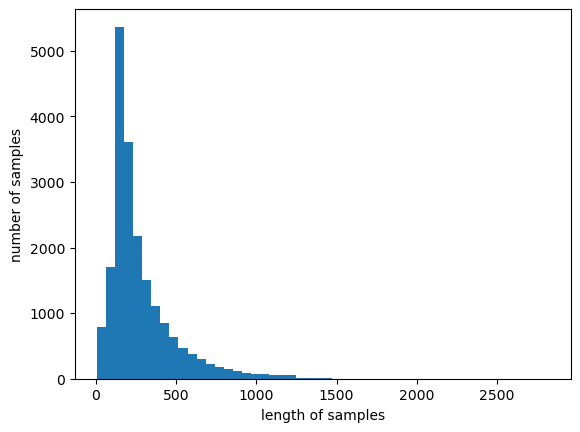

In [39]:
print('리뷰의 최대 길이 :',max(len(review) for review in encoded_X_train))
print('리뷰의 평균 길이 :',sum(map(len, encoded_X_train))/len(encoded_X_train))
plt.hist([len(review) for review in encoded_X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [40]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [41]:
max_len = 500
below_threshold_len(max_len, encoded_X_train)

전체 샘플 중 길이가 500 이하인 샘플의 비율: 87.925


In [42]:
def pad_sequences(sentences, max_len):
  features = np.zeros((len(sentences), max_len), dtype=int)
  for index, sentence in enumerate(sentences):
    if len(sentence) != 0:
      features[index, :len(sentence)] = np.array(sentence)[:max_len]
  return features

In [43]:
padded_X_train = pad_sequences(encoded_X_train, max_len=max_len)
padded_X_valid = pad_sequences(encoded_X_valid, max_len=max_len)
padded_X_test = pad_sequences(encoded_X_test, max_len=max_len)

In [44]:
print('훈련 데이터의 크기 :', padded_X_train.shape)
print('검증 데이터의 크기 :', padded_X_valid.shape)
print('테스트 데이터의 크기 :', padded_X_test.shape)

훈련 데이터의 크기 : (20000, 500)
검증 데이터의 크기 : (5000, 500)
테스트 데이터의 크기 : (25000, 500)


In [45]:
print(padded_X_train.shape[:2])

(20000, 500)


# 5. 모델링

In [46]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [47]:
train_label_tensor = torch.tensor(np.array(y_train))
valid_label_tensor = torch.tensor(np.array(y_valid))
test_label_tensor = torch.tensor(np.array(y_test))

In [48]:
train_label_tensor[:5]

tensor([1, 1, 0, 0, 0])

In [49]:
USE_CUDA = torch.cuda.is_available()
device = torch.device("cuda" if USE_CUDA else "cpu")
print("cpu와 cuda 중 다음 기기로 학습함:", device)

cpu와 cuda 중 다음 기기로 학습함: cpu


In [50]:
# input.shape == (배치 크기, 임베딩 벡터의 차원, 문장 길이)
input = torch.randn(32, 16, 50)

# 선언 시 nn.Conv1d(임베딩 벡터의 차원, 커널의 개수, 커널 사이즈)
m = nn.Conv1d(16, 33, 3, stride=1)

# output.shape == (배치 크기, 커널의 개수, 컨볼루션 연산 결과 벡터)
output = m(input)
print(output.shape)

torch.Size([32, 33, 48])


In [51]:
class CNN(torch.nn.Module):
  def __init__(self, vocab_size, num_labels):
    super(CNN, self).__init__()

    # 오직 하나의 종류의 필터만 사용함.
    self.num_filter_sizes = 1 # 윈도우 5짜리 1개만 사용
    self.num_filters = 256

    self.word_embed = torch.nn.Embedding(num_embeddings=vocab_size, embedding_dim=128, padding_idx=0)
    # 윈도우 5짜리 1개만 사용
    self.conv1 = torch.nn.Conv1d(128, self.num_filters, 5, stride=1)
    self.dropout = torch.nn.Dropout(0.5)
    self.fc1 = torch.nn.Linear(1 * self.num_filters, num_labels, bias=True)

  def forward(self, inputs):
    # word_embed(inputs).shape == (배치 크기, 문장길이, 임베딩 벡터의 차원)
    # word_embed(inputs).permute(0, 2, 1).shape == (배치 크기, 임베딩 벡터의 차원, 문장 길이)
    embedded = self.word_embed(inputs).permute(0, 2, 1)

    # max를 이용한 maxpooling
    # conv1(embedded).shape == (배치 크기, 커널 개수, 컨볼루션 연산 결과) == ex) 32, 256, 496
    # conv1(embedded).permute(0, 2, 1).shape == (배치 크기, 컨볼루션 연산 결과, 커널 개수)
    # conv1(embedded).permute(0, 2, 1).max(1)[0]).shape == (배치 크기, 커널 개수)
    x = F.relu(self.conv1(embedded).permute(0, 2, 1).max(1)[0])

    # y_pred.shape == (배치 크기, 분류할 카테고리의 수)
    y_pred = self.fc1(self.dropout(x))

    return y_pred

In [52]:
encoded_train = torch.tensor(padded_X_train).to(torch.int64)
train_dataset = torch.utils.data.TensorDataset(encoded_train, train_label_tensor)
train_dataloader = torch.utils.data.DataLoader(train_dataset, shuffle=True, batch_size=32)

encoded_test = torch.tensor(padded_X_test).to(torch.int64)
test_dataset = torch.utils.data.TensorDataset(encoded_test, test_label_tensor)
test_dataloader = torch.utils.data.DataLoader(test_dataset, shuffle=True, batch_size=1)

encoded_valid = torch.tensor(padded_X_valid).to(torch.int64)
valid_dataset = torch.utils.data.TensorDataset(encoded_valid, valid_label_tensor)
valid_dataloader = torch.utils.data.DataLoader(valid_dataset, shuffle=True, batch_size=1)

In [53]:
num_epochs = 5
total_batch = len(train_dataloader)
print('총 배치의 수 : {}'.format(total_batch))

총 배치의 수 : 625


In [54]:
model = CNN(vocab_size, num_labels = len(set(y_train)))
model.to(device)

CNN(
  (word_embed): Embedding(38638, 128, padding_idx=0)
  (conv1): Conv1d(128, 256, kernel_size=(5,), stride=(1,))
  (dropout): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=256, out_features=2, bias=True)
)

In [55]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [56]:
def calculate_accuracy(logits, labels):
    # _, predicted = torch.max(logits, 1)
    predicted = torch.argmax(logits, dim=1)
    correct = (predicted == labels).sum().item()
    total = labels.size(0)
    accuracy = correct / total
    return accuracy

In [57]:
def evaluate(model, valid_dataloader, criterion, device):
    val_loss = 0
    val_correct = 0
    val_total = 0

    model.eval()
    with torch.no_grad():
        # 데이터로더로부터 배치 크기만큼의 데이터를 연속으로 로드
        for batch_X, batch_y in valid_dataloader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)

            # 모델의 예측값
            logits = model(batch_X)

            # 손실을 계산
            loss = criterion(logits, batch_y)

            # 정확도와 손실을 계산함
            val_loss += loss.item()
            val_correct += calculate_accuracy(logits, batch_y) * batch_y.size(0)
            val_total += batch_y.size(0)

    val_accuracy = val_correct / val_total
    val_loss /= len(valid_dataloader)

    return val_loss, val_accuracy

In [58]:
# Training loop
best_val_loss = float('inf')

# Training loop
for epoch in range(num_epochs):
    # Training
    train_loss = 0
    train_correct = 0
    train_total = 0
    model.train()
    for batch_X, batch_y in train_dataloader:
        # Forward pass
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        # batch_X.shape == (batch_size, max_len)
        logits = model(batch_X)

        # Compute loss
        loss = criterion(logits, batch_y)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Calculate training accuracy and loss
        train_loss += loss.item()
        train_correct += calculate_accuracy(logits, batch_y) * batch_y.size(0)
        train_total += batch_y.size(0)

    train_accuracy = train_correct / train_total
    train_loss /= len(train_dataloader)

    # Validation
    val_loss, val_accuracy = evaluate(model, valid_dataloader, criterion, device)

    print(f'Epoch {epoch+1}/{num_epochs}:')
    print(f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}')
    print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')

    # 검증 손실이 최소일 때 체크포인트 저장
    if val_loss < best_val_loss:
        print(f'Validation loss improved from {best_val_loss:.4f} to {val_loss:.4f}. 체크포인트를 저장합니다.')
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'best_model_checkpoint.pth')

Epoch 1/5:
Train Loss: 0.6591, Train Accuracy: 0.6379
Validation Loss: 0.4589, Validation Accuracy: 0.7962
Validation loss improved from inf to 0.4589. 체크포인트를 저장합니다.
Epoch 2/5:
Train Loss: 0.4996, Train Accuracy: 0.7570
Validation Loss: 0.3806, Validation Accuracy: 0.8322
Validation loss improved from 0.4589 to 0.3806. 체크포인트를 저장합니다.
Epoch 3/5:
Train Loss: 0.4054, Train Accuracy: 0.8127
Validation Loss: 0.3272, Validation Accuracy: 0.8626
Validation loss improved from 0.3806 to 0.3272. 체크포인트를 저장합니다.
Epoch 4/5:
Train Loss: 0.3197, Train Accuracy: 0.8605
Validation Loss: 0.3353, Validation Accuracy: 0.8552
Epoch 5/5:
Train Loss: 0.2362, Train Accuracy: 0.9041
Validation Loss: 0.3167, Validation Accuracy: 0.8684
Validation loss improved from 0.3272 to 0.3167. 체크포인트를 저장합니다.


In [59]:
# 모델 로드
model.load_state_dict(torch.load('best_model_checkpoint.pth'))

# 모델을 device에 올립니다.
model.to(device)

# 검증 데이터에 대한 정확도와 손실 계산
val_loss, val_accuracy = evaluate(model, valid_dataloader, criterion, device)

print(f'Best model validation loss: {val_loss:.4f}')
print(f'Best model validation accuracy: {val_accuracy:.4f}')

Best model validation loss: 0.3167
Best model validation accuracy: 0.8684


In [60]:
# 테스트 데이터에 대한 정확도와 손실 계산
test_loss, test_accuracy = evaluate(model, test_dataloader, criterion, device)

print(f'Best model test loss: {test_loss:.4f}')
print(f'Best model test accuracy: {test_accuracy:.4f}')

Best model test loss: 0.3146
Best model test accuracy: 0.8670


In [61]:
index_to_tag = {0 : '부정', 1 : '긍정'}

In [62]:
def predict(text, model, word_to_index, index_to_tag):
    # 모델 평가 모드
    model.eval()

    # 토큰화 및 정수 인코딩. OOV 문제 발생 시 <UNK> 토큰에 해당하는 인덱스 1 할당
    tokens = word_tokenize(text)
    token_indices = [word_to_index.get(token.lower(), 1) for token in tokens]

    # 리스트를 텐서로 변경
    input_tensor = torch.tensor([token_indices], dtype=torch.long).to(device)  # (1, seq_length)

    # 모델의 예측
    with torch.no_grad():
        logits = model(input_tensor)  # (1, output_dim)

    # 레이블 인덱스 예측
    _, predicted_index = torch.max(logits, dim=1)  # (1,)

    # 인덱스와 매칭되는 카테고리 문자열로 변경
    predicted_tag = index_to_tag[predicted_index.item()]

    return predicted_tag

In [63]:
test_input = "This movie was just way too overrated. The fighting was not professional and in slow motion. I was expecting more from a 200 million budget movie. The little sister of T.Challa was just trying too hard to be funny. The story was really dumb as well. Don't watch this movie if you are going because others say its great unless you are a Black Panther fan or Marvels fan."

predict(test_input, model, word_to_index, index_to_tag)

'부정'

In [64]:
test_input = " I was lucky enough to be included in the group to see the advanced screening in Melbourne on the 15th of April, 2012. And, firstly, I need to say a big thank-you to Disney and Marvel Studios. \
Now, the film... how can I even begin to explain how I feel about this film? It is, as the title of this review says a 'comic book triumph'. I went into the film with very, very high expectations and I was not disappointed. \
Seeing Joss Whedon's direction and envisioning of the film come to life on the big screen is perfect. The script is amazingly detailed and laced with sharp wit a humor. The special effects are literally mind-blowing and the action scenes are both hard-hitting and beautifully choreographed."

predict(test_input, model, word_to_index, index_to_tag)

'긍정'